# CS235 Project


The goal of this project is to correctly classify any particular pokemon’s type from the image of the pokemon or from other attributes of the pokemon using ConvNets and linear regression respectively.  There are a total of  eighteen different Pokémon types which include but are not limited to Poison, Ground, Rock, Bug, Ghost, Steel, and Fire to name a few. In addition, there are 8 attributes that all pokemon have for instance HP, Attack, and Defense. Furthermore, pokemon are not limited to one single type, some of them can have 2 types. This will make classifying both types more tricky since with only one type we would have 1/18 chance of getting it right if we guess, however with the addition of the second type we now have a 171 permutations or 1/171 chance about being correct just by guessing. However the real number of types is 136 since a lot of the possible combinations have not yet been used on any pokemon.  In order to achieve decent performance we will need our models to find high other representations in of the data. We do not expect to get high performance, since even human performance in this data would be far from perfect. Some instances like Charmander are pretty obvious to be fire type  simply from the color and the flame on its tail however, some might confuse it for a dragon type as well which is incorrect.  One of the methods that we will be using is a convolutional neural network since it is known to achieve good performance on image classification task. The other method that we will be using will be logistic regression to on attribute data. We hope the a linear combination of  the attributes will be have some hints of the types of the pokemon but think that is unrealistic considering that the pokemon attributes are balanced. 


The two data sets can be found here:

[6036 label pokemon pictures ](https://www.kaggle.com/hannesrosenbusch/6036-labeled-pokemon-pictures#poke_image_data.npy)


[Better data all 7 Generations of Pokemon](https://github.com/udacity/AIPND/blob/master/Matplotlib/data/pokemon.csv)

<img src="Proposal image.jpg">




# TODO

Data Cleaning $\checkmark$

Data integration $\checkmark$

Data Augmentation $\checkmark$ 

Image train/test/validation sets  $\checkmark$ 

Data statistics(Mode, Histograms, scatterplots, HeatMap)

Predictive models 
* k nearest neighbor
* Logistic Regression
* CovNet


In [2]:
#imports
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
# %matplotlib inline
# plt.rcParams["figure.figsize"] = (16, 9) # (w, h)

## Data Integration
For Data integration, we plan to incorporate all different aspects of a pokemon from different datasets and see how this affects our classification. For example, while one dataset has the images of each pokemon, the other has some of their main attributes and pokedex numbers etc. We want to see how incorporating both sets vs using a single set will affect our classification


In [ ]:
# import os0
# import numpy as np 
# import pandas as pd 


# #load files to integrate 
# image_labels = pd.read_csv('old_image_lables.csv', usecols= ['Name'], header = 'infer')
# stats_data = pd.read_csv('pokemon_final.csv', usecols= ['Name', 'Type 1', 'Type 2'], header = 'infer')

# #Create out file with names maching images 
# out_file = image_labels

# #Appends the types to the name 
# Type1 = pd.Series([])
# Type2 = pd.Series([])
# names = {'None missing'}
# for i in range(len(image_labels)):
#     row = None
#     name = image_labels.iloc[i]['Name']
#     if(((stats_data['Name']== name.lower()).any())):
#         row = stats_data.loc[stats_data['Name']==name.lower()]
#         Type1[i] = row.iat[0,1]
#         Type2[i] = row.iat[0,2]
#     else:
#         #Display name of missing pokemon 
#         names.add(name)
# #Display all missing pokemon
# print(names)
    
# out_file.insert(loc=1, column = 'Type 1', value = Type1)
# out_file.insert(loc=2, column = 'Type 2', value = Type2)

# out_file.head()
    
# out_file.to_csv('poke_image_labels.csv') #Write to file 


## Data augmentation
The dataset that we are using has 6036 images. Our goal is to use data augmentation to 10 fold the amount of images that we have by performing image manipulation like cropping, inverting, flipping, rotating, and increasing or decreasing the brightness, and saturation all the images. We hope that by doing this out convolutional neural network will become more robust and perform better on new data. 
We intend to make somewhere around 60k images and use 50k for training and 10k for testing. 


### Original Image

(6036, 3)


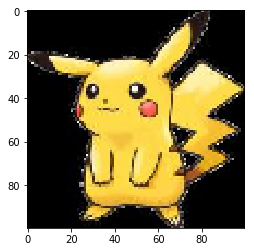

In [2]:
data = np.load('/home/onil/Documents/CS235/poke_image_data.npy')
labels = pd.read_csv('poke_image_labels.csv', header = 'infer')
print(labels.shape)
image = data[3951] #pikachu
# #How do the images look like? Example:
example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)

### Separate data testing vs training

In [4]:
data = np.load('/home/onil/Documents/CS235/poke_image_data.npy')
labels = pd.read_csv('poke_image_labels.csv', header = 'infer')

print(labels.shape)

names = pd.read_csv('pokemon_final.csv', header = 'infer')


names = names.sort_values('Name')
print(names.shape)
i = 0
test_set = []
del_list = []
for j in range(len(labels)):
    if(i ==  names.shape[0]):
        break
    if(names.iat[i,1].lower() ==  labels.iat[j,0].lower()):
        if(names.iat[i,1].lower() ==  labels.iat[j+3,0].lower()):
            #print(names.iat[i,1])
            test_set.append(data[j])
#             test_set.append(data[j+1])
            del_list.append(j)
#             del_list.append(j+1)
            i+=1
        else:
            i+=1
            
data = np.delete(data,del_list, axis = 0)
test_set = np.array(test_set)           
print(test_set.shape)           
print(data.shape)
np.save("Data/poke_test_set.npy", test_set)
np.save("Data/poke_train_set.npy", data)

test_labels = labels._slice(del_list)
print(test_labels.shape)
train_labels = labels.drop(del_list)
print(train_labels.shape)
# labels._slice(slice(del_list))

test_labels.to_csv('Data/poke_test_labels.csv') #Write to file 
train_labels.to_csv('Data/poke_train_labels.csv') #Write to file 

(6036, 3)
(805, 14)
(651, 100, 100, 3)
(5385, 100, 100, 3)
(651, 3)
(5385, 3)


### First change the background of all images to white

(5385, 100, 100, 3)
(5385, 4)
(10770, 100, 100, 3)
(10770, 4)


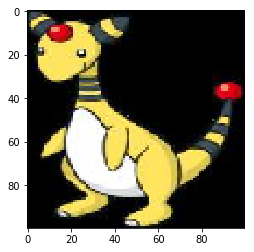

In [8]:
#read in data
labels = pd.read_csv('Data/poke_train_labels.csv', header = 'infer')
data = np.load('Data/poke_train_set.npy')

print(data.shape)
print(labels.shape)
image = data[20]

new_images = []
for i in range(data.shape[0]):
    image = np.copy(data[i])
    #change image background 
    image[np.all(image <= [20, 20, 20], axis= 2)] = [255,255,255]
    new_images.append(image)

new_images = np.array(new_images)
new_images = np.vstack((data, new_images))
print(new_images.shape)   
np.save("Data/poke_train_set_aug.npy", new_images)

image = new_images[103]

# #How do the images look like? Example:
example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)


#Stack the lables 
labels = pd.concat([labels,labels], axis=0)
labels.to_csv('Data/poke_train_labels_aug.csv')
print(labels.shape)

### Append horizotal flip images

(10770, 5)
(10770, 100, 100, 3)
(21540, 100, 100, 3)
(21540, 5)


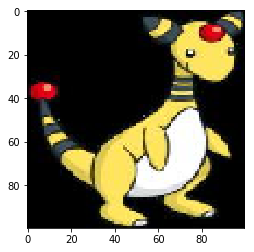

In [9]:
#read data
labels = pd.read_csv('Data/poke_train_labels_aug.csv', header = 'infer')
data = np.load('Data/poke_train_set_aug.npy')

print(labels.shape)
print(data.shape)
image = data[1000]

#Flip images horizontally 
new_images = []
for i in range(data.shape[0]):
    image = np.copy(data[i])
    #change image background 
    image = image[:, ::-1]
    new_images.append(image)

new_images = np.array(new_images)
new_images = np.vstack((data, new_images))
print(new_images.shape)   
np.save("Data/poke_train_set_aug.npy", new_images)

image = new_images[103+10770] #pikachu

example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)


#Stack the lables 
labels = pd.concat([labels,labels], axis=0)
labels.to_csv('Data/poke_train_labels_aug.csv')
print(labels.shape)

### Change brightness 

(21540, 6)
(21540, 100, 100, 3)
(64620, 100, 100, 3)
(64620, 6)


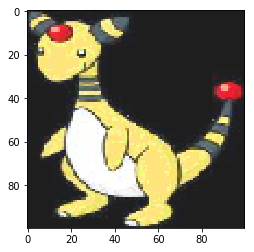

In [10]:
#read data
labels = pd.read_csv('Data/poke_train_labels_aug.csv', header = 'infer')
data = np.load('Data/poke_train_set_aug.npy')

print(labels.shape)
print(data.shape)
image = data[100]

brightness = 30
darken = -30
new_images1 = []
new_images2 = []
for i in range(data.shape[0]):
    limage =np.copy(data[i])
    dimage =np.copy(data[i])
    limage[limage < [255-brightness,255-brightness,255-brightness]] += brightness
    dimage[dimage > [brightness,brightness,brightness]] -= brightness
    new_images1.append(limage)
    new_images2.append(dimage)
    


new_images1 = np.array(new_images1)
new_images2 = np.array(new_images2)
new_images1 = np.vstack((data, new_images1,new_images2))
print(new_images1.shape)   
np.save("Data/poke_train_set_aug.npy", new_images1)

image = new_images1[103+21540]

example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)

#Stack the lables 
labels = pd.concat([labels,labels,labels], axis=0)
labels.to_csv('Data/poke_train_labels_aug.csv')
print(labels.shape)

### Crop images 
<div class="alert alert-success">
Warning requires 16GB of memory to execute next box
</div>

In [ ]:
# #read data
# labels = pd.read_csv('Data/poke_image_labels_72k.csv', header = 'infer')
# data = np.load("Data/poke72k.npy")
# print(data.shape)

# new_images = []
# for i in range(data.shape[0]):
#     image = np.copy(data[i])
#     image = cv2.resize(image[10:90,10:90:], dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
#     new_images.append(image1)

# new_images = np.array(new_images)
# new_images = np.vstack((data, new_images))
# print(new_images.shape)   
# np.save("Data/poke144k.npy", new_images)

# image = new_images1[3951+6036*10]
# # example_pic = Image.fromarray(image[10:60,20:80:], 'RGB')
# example_pic = Image.fromarray(image, 'RGB')
# plt.imshow(example_pic)

# #Stack the lables 
# labels = pd.concat([labels, labels], axis=0)
# labels.to_csv('Data/poke_image_labels_144k.csv')

### Final results

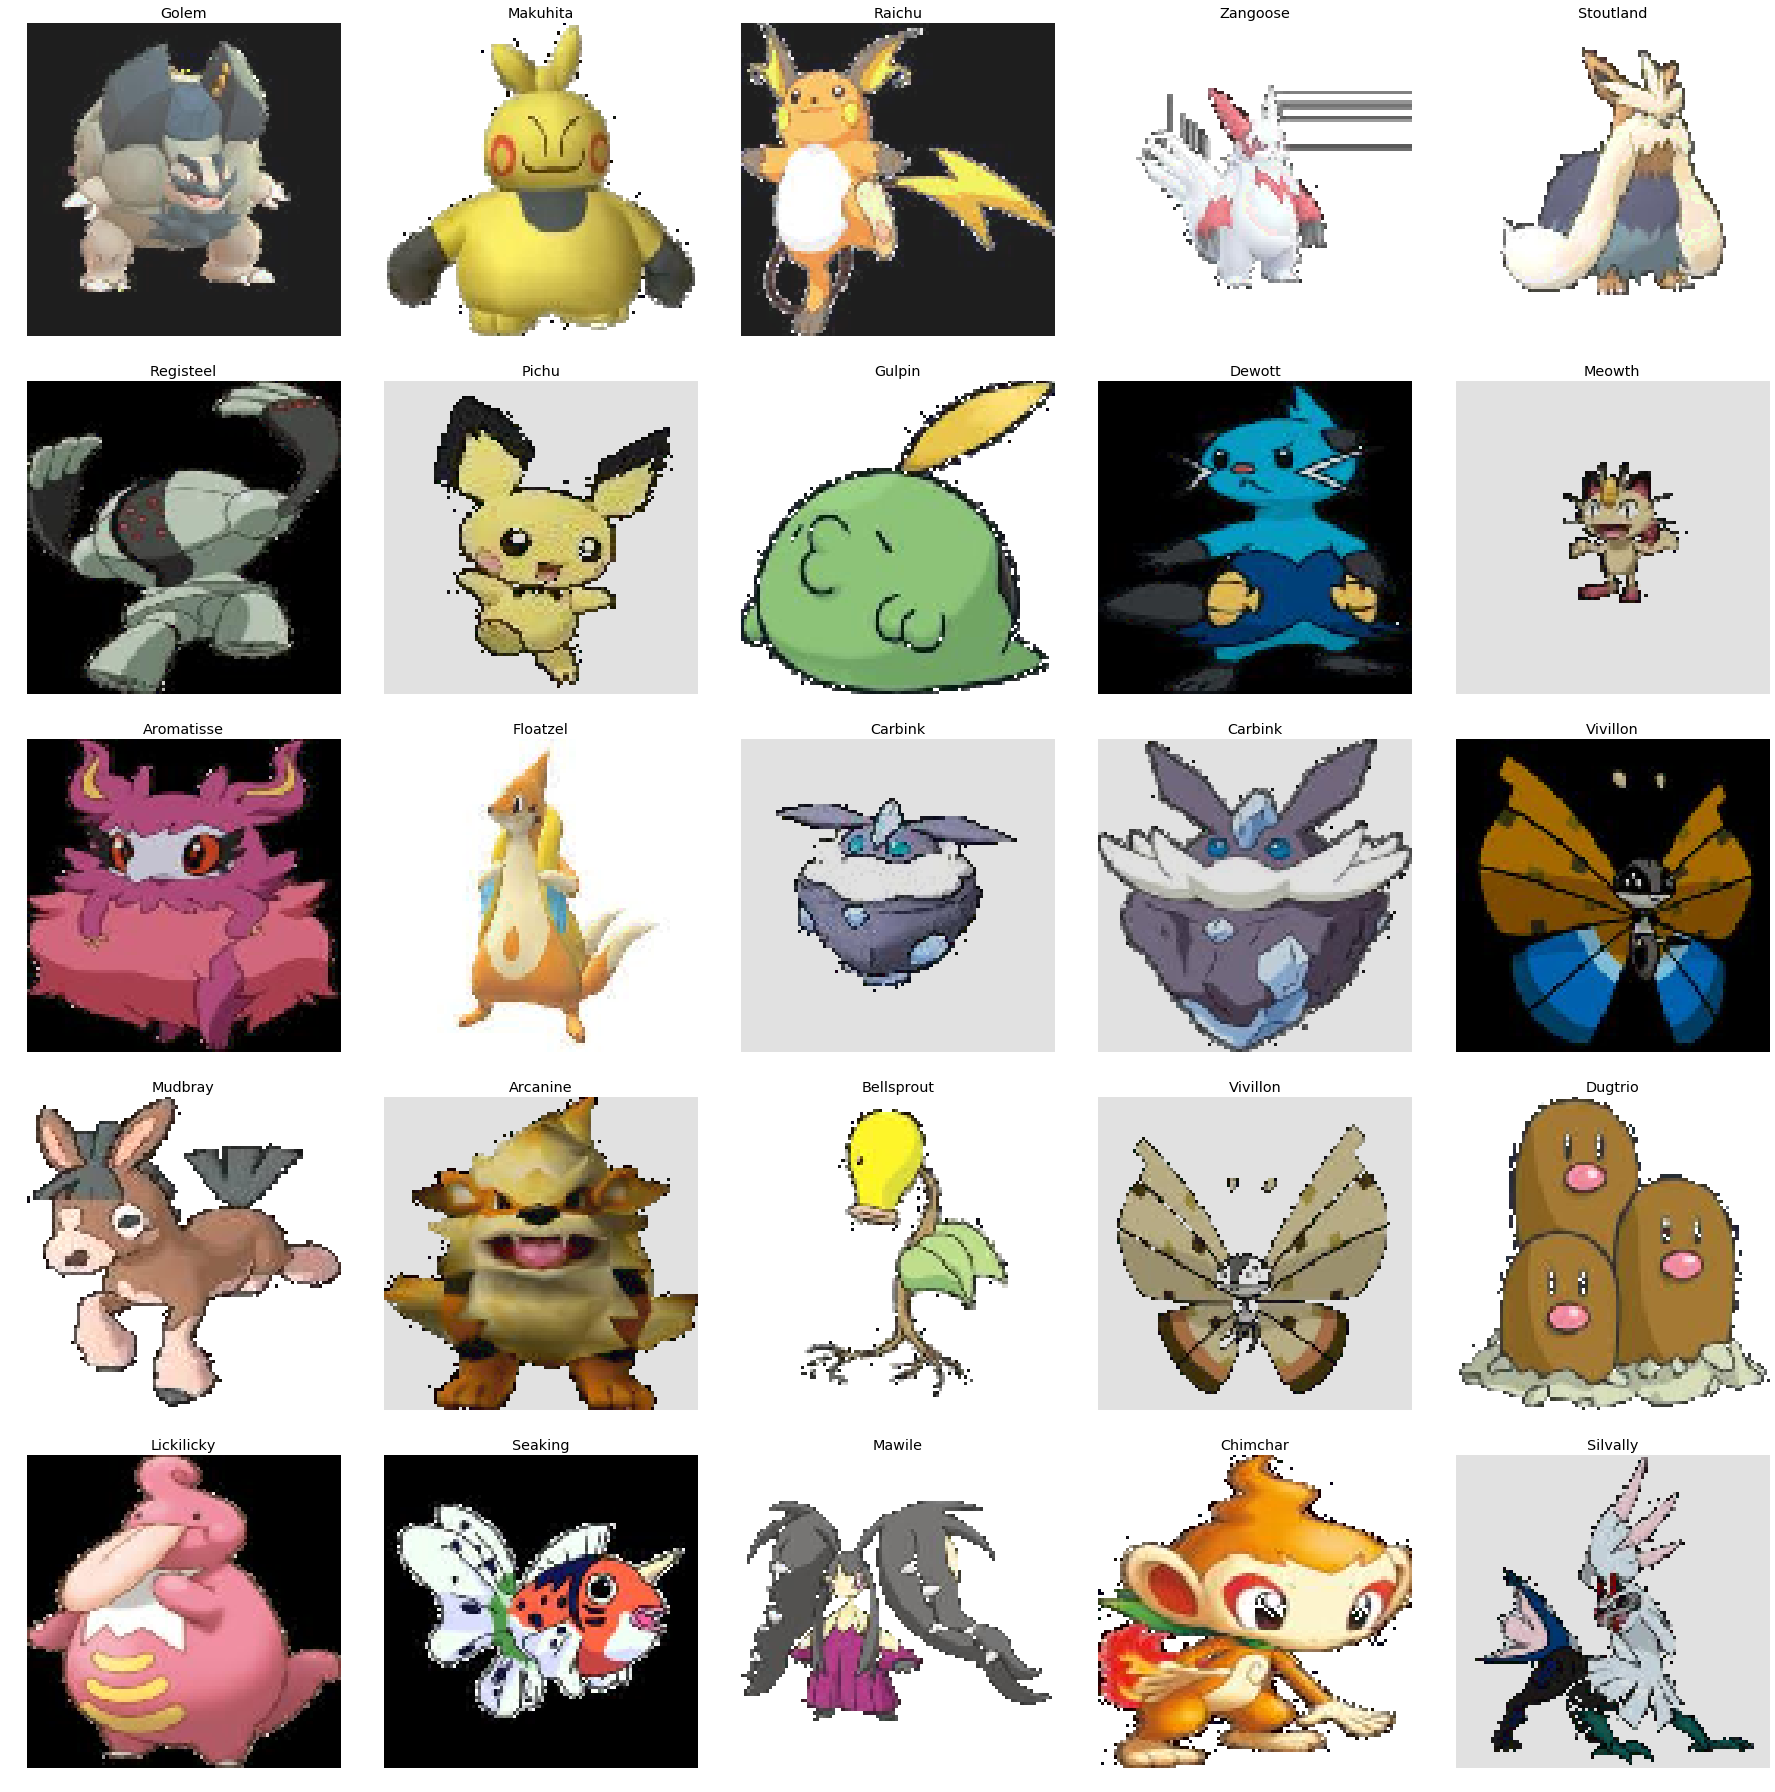

In [11]:

labels = pd.read_csv('Data/poke_train_labels_aug.csv', header = 'infer')
data = np.load("Data/poke_train_set_aug.npy")


# example_pic = Image.fromarray(image[10:60,20:80:], 'RGB')
# example_pic = Image.fromarray(image3, 'RGB')
# plt.imshow(example_pic)

#How do the labels look like? Example:
# labels.iloc[3951+6036*6]

fig=plt.figure(figsize=(25, 25))
for i, index in enumerate(np.random.choice(data.shape[0], size=25, replace=False)):
    example_pic = data[index]
    fig.add_subplot(5, 5, i+1)
    plt.imshow(example_pic)
    plt.axis('off')
    plt.title(labels.iat[index,0],fontsize='x-large')
    
plt.tight_layout()
plt.show()



### Shuffle and split data set. 
<div class="alert alert-success">
Warning requires 16GB of memory to execute next box
</div>

In [5]:
# labels = pd.read_csv('poke_image_labels.csv', header = 'infer')

# type_dict = dict()
# j = 0
# type_list = []
# for i in range(len(labels)):
#     type1 = str(labels.iat[i,1]) +"/"+ str(labels.iat[i,2])
#     type2 = str(labels.iat[i,2]) +"/"+ str(labels.iat[i,1])
#     if(type1 not in type_dict):
#         type_list.append(type1)
#         type_dict[type1] = j
#         type_dict[type2] = j
#         j+=1
# print(str(j) + " Numer of used types in the data")
# np.save("Data/poke_types.npy",type_list)

# labels = pd.read_csv('Data/poke_final_test_labels.csv', header = 'infer')
# data = np.load("Data/poke_final_test.npy")

# dl = []
# for i in range(data.shape[0]):
#     type1 = str(labels.iat[i,1]) +"/"+ str(labels.iat[i,2])
#     dl.append([data[i],labels.iat[i,0],type_dict[type1]])
    
# data = None
# labels = None
# np.random.shuffle(dl)
# dl[0]

# dl = np.array(dl)
# print(dl.shape)

# #split data 
# # np.save("Data/poke_train.npy",dl)
# # np.save("Data/poke_valid.npy",dl)


# np.save("Data/poke_test.npy",dl)


136 Numer of used types in the data
(5752, 3)


# Mainly for GAN

### Work with new cleaner sprites Data, New method
Found here
[PokeAPI](https://github.com/PokeAPI/sprites)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
from PIL import Image

In [ ]:
#smart crop delete as much of the back background around each pokemon 
def smart_crop(im):
    top, down , left ,right = 0,im.shape[0],0,im.shape[0]
    while top < im.shape[0]:
            if((im[:top] == [0,0,0]).all()):
                top+=1
            else:
                top-=1
                break 
    while down > 0:
            if((im[down:] == [0,0,0]).all()):
                down-=1
            else:
                down+=1
                break
    while left < im.shape[0]:
            if((im[:,:left:] == [0,0,0]).all()):
                left+=1
            else:
                left-=1
                break 
    while right > 0:
            if((im[:,right::] == [0,0,0]).all()):
                right-=1
            else:
                right+=1
                break
    return top, down , left ,right 

In [ ]:
def flip_h(data):
    #Flip images horizontally 
    new_images = []
    for i in range(data.shape[0]):
        image = np.copy(data[i])
        #change image background 
        image = image[:, ::-1]
        new_images.append(image)

    new_images = np.array(new_images)
    new_images = np.vstack((data, new_images))  
    
    return new_images 


In [ ]:
# fill_color = (0,0,0)
# pics = []
# for im_path in sorted(glob.glob("sprites-master/sprites/pokemon/Original/*.png")):
#     im = Image.open(im_path)
#     im = im.convert('RGBA')
#     if im.mode in ('RGBA', 'LA'):
#         background = Image.new(im.mode[:-1], im.size, fill_color)
#         background.paste(im, im.split()[-1]) # omit transparency
#         im = background
#     im = im.convert('RGB')
#     im = np.array(im)
#     top, down , left ,right = smart_crop(im)
#     #change image background to from black to white
# #     im [np.all(im == [0,0,0], axis= 2)] = [255,255,255]
#     res = cv2.resize(im[top:down,left:right:], dsize=(100,100), interpolation=cv2.INTER_CUBIC)
#     pics.append(res)

# for im_path in glob.glob("sprites-master/sprites/pokemon/shiny/*.png"):
#     im = Image.open(im_path)
#     im = im.convert('RGBA')
#     if im.mode in ('RGBA', 'LA'):
#         background = Image.new(im.mode[:-1], im.size, fill_color)
#         background.paste(im, im.split()[-1]) # omit transparency
#         im = background
#     im = im.convert('RGB')
#     im = np.array(im)
#     top, down , left ,right = smart_crop(im)
#     #change image background to from black to white
#     im [np.all(im == [0,0,0], axis= 2)] = [255,255,255]
#     res = cv2.resize(im[top:down,left:right:], dsize=(100,100), interpolation=cv2.INTER_CUBIC)
#     pics.append(res)

# for im_path in glob.glob("sprites-master/sprites/pokemon/shiny/female/*.png"):
#     im = Image.open(im_path)
#     im = im.convert('RGBA')
#     if im.mode in ('RGBA', 'LA'):
#         background = Image.new(im.mode[:-1], im.size, fill_color)
#         background.paste(im, im.split()[-1]) # omit transparency
#         im = background
#     im = im.convert('RGB')
#     im = np.array(im)
#     top, down , left ,right = smart_crop(im)
#     #change image background to from black to white
#     im [np.all(im == [0,0,0], axis= 2)] = [255,255,255]
#     res = cv2.resize(im[top:down,left:right:], dsize=(100,100), interpolation=cv2.INTER_CUBIC)
#     pics.append(res)
    
# for im_path in glob.glob("sprites-master/sprites/pokemon/female/*.png"):
#     im = Image.open(im_path)
#     im = im.convert('RGBA')
#     if im.mode in ('RGBA', 'LA'):
#         background = Image.new(im.mode[:-1], im.size, fill_color)
#         background.paste(im, im.split()[-1]) # omit transparency
#         im = background
#     im = im.convert('RGB')
#     im = np.array(im)
#     top, down , left ,right = smart_crop(im)
#     #change image background to from black to white
# #     im [np.all(im == [0,0,0], axis= 2)] = [255,255,255]
#     res = cv2.resize(im[top:down,left:right:], dsize=(100,100), interpolation=cv2.INTER_CUBIC)
#     pics.append(res)
    
# path = sorted(glob.glob("sprites-master/sprites/pokemon/model/*.png"), key=lambda name: int(name[37:-4]))
# for im_path in path:
#     im = Image.open(im_path)
#     im = im.convert('RGBA')
#     if im.mode in ('RGBA', 'LA'):
#         background = Image.new(im.mode[:-1], im.size, fill_color)
#         background.paste(im, im.split()[-1]) # omit transparency
#         im = background
#     im = im.convert('RGB')
#     im = np.array(im)
#     top, down , left ,right = smart_crop(im)
#     #change image background to from black to white
# #     im [np.all(im == [0,0,0], axis= 2)] = [255,255,255]
#     res = cv2.resize(im[top:down,left:right:], dsize=(100,100), interpolation=cv2.INTER_CUBIC)
#     pics.append(res)
    
# path = sorted(glob.glob("sprites-master/sprites/pokemon/other-sprites/official-artwork/*.png"), key=lambda name: int(name[62:-4]))
# for im_path in path:
#     im = Image.open(im_path)
#     im = im.convert('RGBA')
#     if im.mode in ('RGBA', 'LA'):
#         background = Image.new(im.mode[:-1], im.size, fill_color)
#         background.paste(im, im.split()[-1]) # omit transparency
#         im = background
#     im = im.convert('RGB')
#     im = np.array(im)
#     top, down , left ,right = smart_crop(im)
#     #change image background to from black to white
# #     im [np.all(im == [0,0,0], axis= 2)] = [255,255,255]
#     res = cv2.resize(im[top:down,left:right:], dsize=(100,100), interpolation=cv2.INTER_CUBIC)
#     pics.append(res)
    

# pics = np.array(pics)

# pics = flip_h(pics)
# print(pics.shape)
# plt.imshow(pics[8])
# np.save("Data/poke_final_test.npy", pics)

In [ ]:

# labels1 = pd.read_csv('sprites-master/sprites/pokemon/model_stats.csv', header = 'infer')
# labels2 = pd.read_csv('sprites-master/sprites/pokemon/other-sprites/official_artwork_stats.csv', header = 'infer')

                 
# labels = pd.concat([labels1,labels2,labels1,labels2,labels1,labels2,labels1,labels2], axis=0)           
# labels.to_csv('Data/poke_final_test_labels.csv')
# print(labels.shape)